# Support vector machine

## Parâmetros de treinamento

- gama: menor Y, mais linear a borda

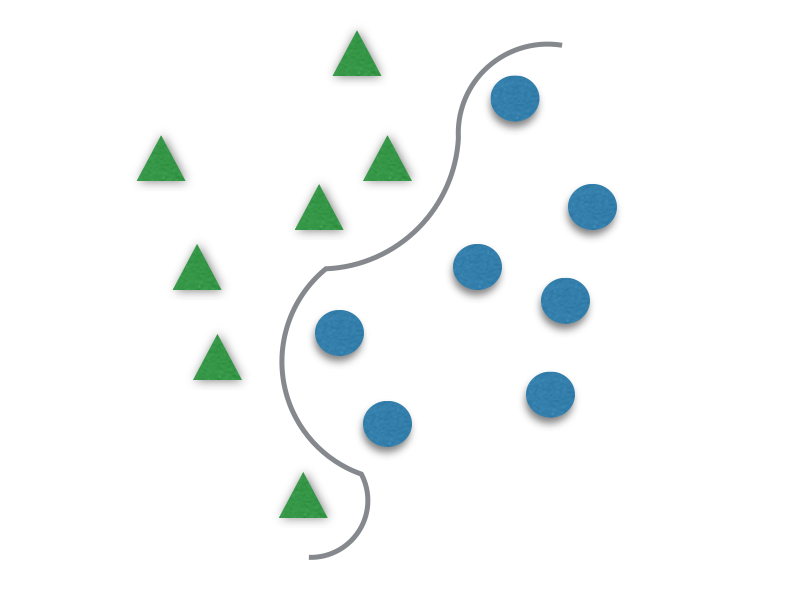

-cost: menor o C, maior a margem

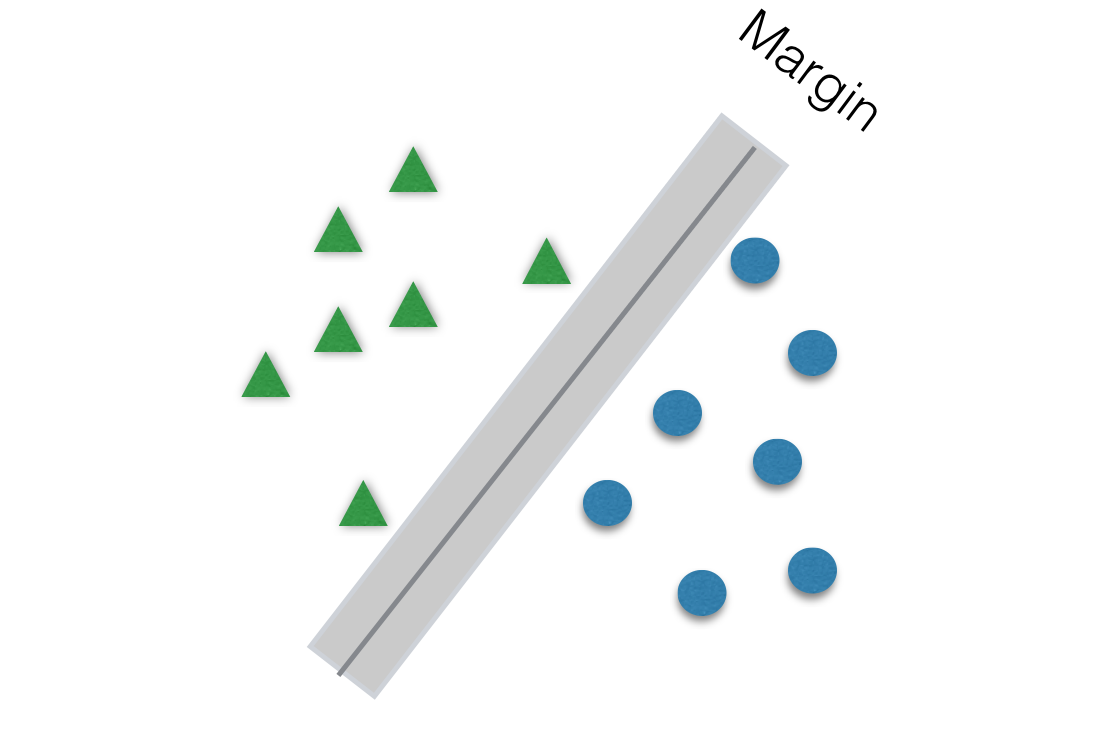

# Aplicação prática

## Preparando ambiente

In [ ]:
install.packages('raster')
require(raster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’


Loading required package: raster

Loading required package: sp



In [ ]:
install.packages('rgdal')
require(rgdal)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rgdal

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-25, (SVN revision 1143)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-5



In [ ]:
install.packages('e1071')
require(e1071)

In [ ]:
require(dplyr)

Loading required package: dplyr



## Pontos de referência para treinamento

In [ ]:
pontosTreinamento = shapefile('cipef_poi.shp')
table(pontosTreinamento@data$class)

In [ ]:
aoi = brick('cipef_50cm_v2.tif')
names(aoi) = c("red", "green", 'blue', 'alpha')
aoi = aoi[[-4]]

In [ ]:
sampvals = extract(aoi, pontosTreinamento, df = TRUE)
sampvals = sampvals[, -1]
sampdata = data.frame(classvalue = pontosTreinamento@data$class, sampvals)
head(sampdata)

In [ ]:
sampdata = sampdata %>% mutate(classvalue = ifelse(classvalue == 1,1,0))
table(sampdata$classvalue)


 0  1 
33 26 

## Treinamento

In [ ]:
svm.veg = svm(classvalue ~ ., data = sampdata, kernel = "radial", gamma = 0.1, cost = 1)

## Classificação

In [ ]:
imaClass = predict(aoi, svm.veg)
imaClass

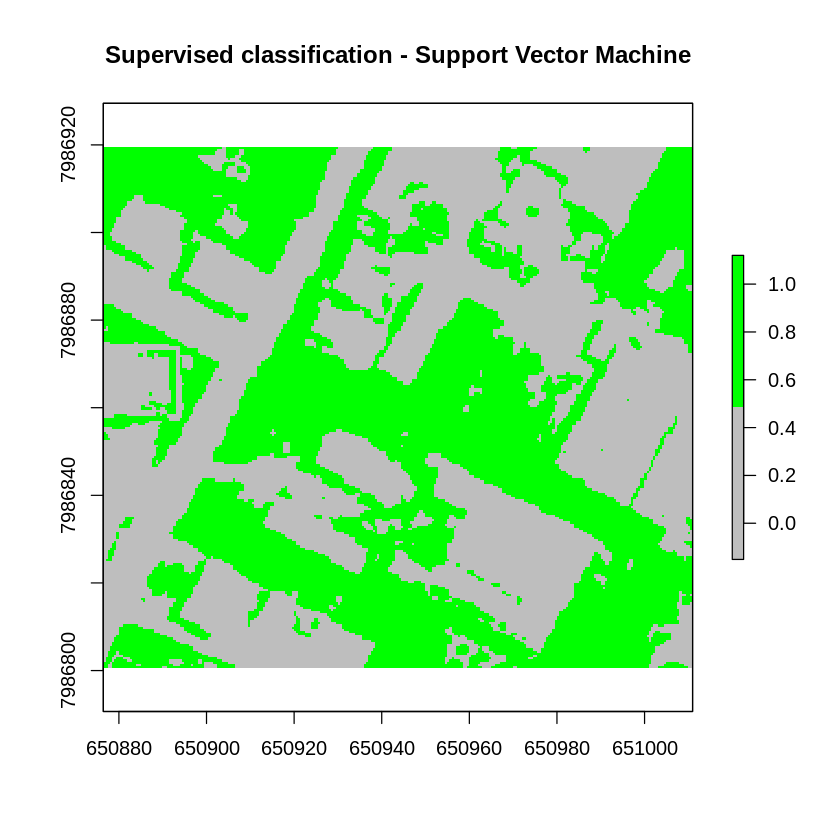

In [ ]:
mycolor <- c("gray", "green")

plot(imaClass, main = 'Supervised classification - Support Vector Machine', col = mycolor)